Number of clusters (excluding noise): 13
Number of classes: 2
Cross-tabulation of labels and clusters:
 Clusters  -1    0    1    2    3    4    5    6    7    8    9    10   11   12
Labels                                                                        
0         117  324    1   14   44   10    7    5    8    5    8    1    1    4
1         154  111    4    3   41    2    0    7   10    0    0    5    4    1
Are classes well separated into individual clusters?: False
Do some classes correspond to several clusters?: True
Are class labels completely irrelevant to the clusters formed?: True


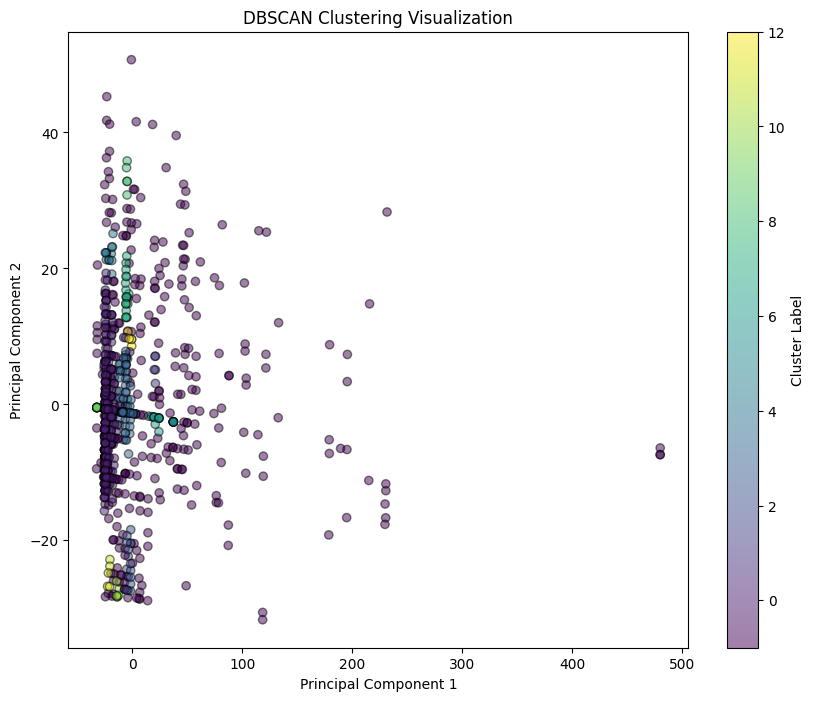

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the data
def load_and_preprocess(filepath):
    data = pd.read_csv(filepath)
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
    labels = data['Survived']
    data.drop('Survived', axis=1, inplace=True)
    return data, labels

# Perform DBSCAN clustering and analyze
def dbscan_and_analyze(data, labels, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)

    # Check if all points are noise
    if len(set(clusters)) == 1 and -1 in clusters:
        print("All points classified as noise. Try adjusting eps and min_samples.")
        return

    # Analyze clusters
    comparison_df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})
    cross_tab = pd.crosstab(comparison_df['Labels'], comparison_df['Clusters'])
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    num_classes = len(set(labels))

    print("Number of clusters (excluding noise):", num_clusters)
    print("Number of classes:", num_classes)
    print("Cross-tabulation of labels and clusters:\n", cross_tab)
    print("Are classes well separated into individual clusters?:", num_clusters == num_classes)
    print("Do some classes correspond to several clusters?:", cross_tab.apply(lambda x: x > 0).sum(axis=1).max() > 1)
    print("Are class labels completely irrelevant to the clusters formed?:", num_clusters != num_classes)

    # Visualize clusters
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5, edgecolor='k')
    plt.title('DBSCAN Clustering Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

file_path = 'Titanic-Dataset.csv'
titanic_data, labels = load_and_preprocess(file_path)
dbscan_and_analyze(titanic_data, labels, eps=3, min_samples=5)


In [ ]:
# Try different values of eps and min_samples
for eps_value in [2, 3, 4, 5]:  # Increasing eps
    for min_samples_value in [3, 5, 10]:  # Adjusting min_samples
        print(f"Testing DBSCAN with eps={eps_value} and min_samples={min_samples_value}")
        dbscan_and_analyze(titanic_data, labels, eps=eps_value, min_samples=min_samples_value)